# Workflow - Machine learning

Neste projeto fiz um modelo de classificação emails são real e spam base de dados tem total de 5172 linhas 3002 e colunas. No dataset existe uma coluna chamado de Prediction, essa coluna a ser classificado ela está como email para spam 0 para verdadeiro real 1.
Objetivo e classificar email que são spam e real.
Nesse projeto está tudo documentado os passos que fiz nesse projeto.

- O que pipeline: Pipeline otimização para o modelo Machine learning para não ter overfitting no modelo.

**Base de dados original**

https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv

In [ ]:
#!pip install mlxtend
#!pip install watermark

In [1]:
# Versão do python 
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.3.4
numpy     : 1.20.3
seaborn   : 0.11.2
matplotlib: 3.4.3



In [4]:
# Configuração dos gráficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

# Base dados 

In [5]:
# Carregando base dados

base = pd.read_csv("emails.csv")
base.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Exibindo os 5 primeiras linhas com o comando head()
base.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# Exibindo os 5 últimos linhas com o comando tail()
base.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Visualizando linhas colunas
base.shape

(5172, 3002)

In [9]:
# Info dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [10]:
# Exibindo os tipos de dados
base.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [11]:
# Visualizando dados nulos
base.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [12]:
# Verificando dados duplicados
base.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5167    False
5168    False
5169    False
5170    False
5171    False
Length: 5172, dtype: bool

In [13]:
# Quantidade email spam e real

total = base.Prediction
print(total.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


In [14]:
# Retorna a variação imparcial
base.var()

the           137.945235
to             90.908132
ect           198.842192
and            36.553750
for            21.907283
                 ...    
military        0.019295
allowing        0.005205
ff              7.729530
dry             0.009621
Prediction      0.205950
Length: 3001, dtype: float64

# Análise de dados

Text(0, 0.5, 'Total')

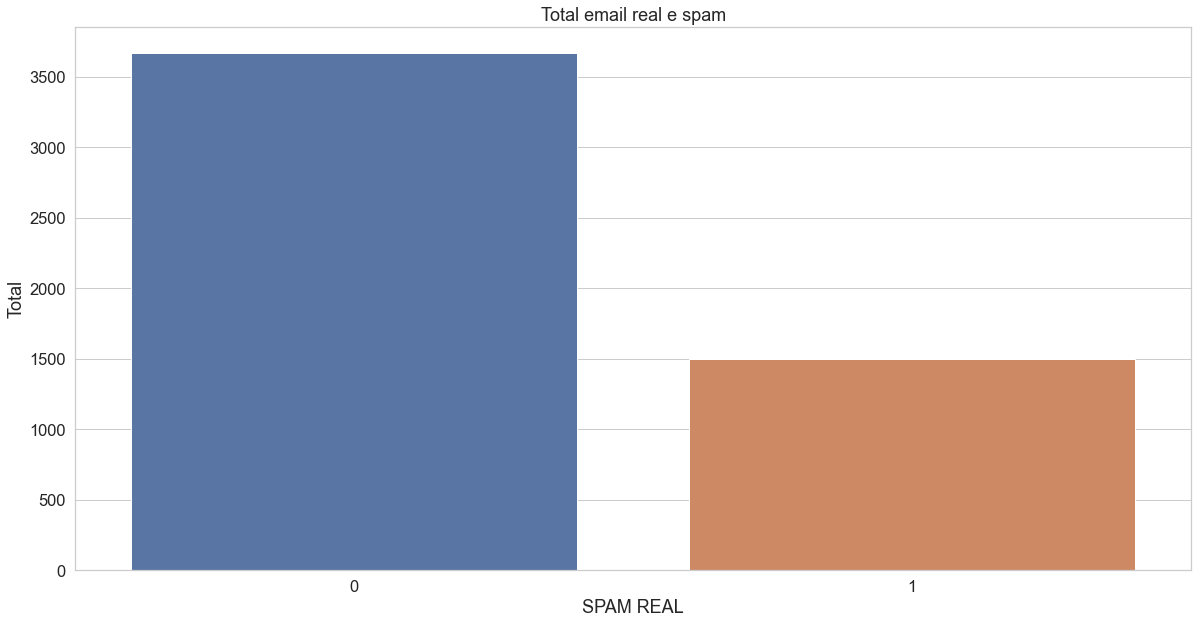

In [15]:
plt.figure(figsize=(20, 10))

plt.title("Total email real e spam")
sns.countplot(base["Prediction"])
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

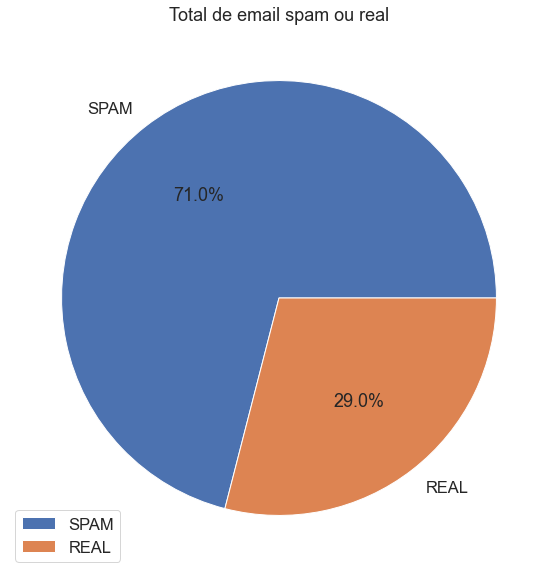

In [16]:
plt.figure(figsize=(20, 10))

plt.pie(base.groupby("Prediction")['Prediction'].count(), labels=["SPAM", "REAL"], autopct = "%1.1f%%");
plt.title("Total de email spam ou real")
plt.legend(["SPAM", "REAL"])

Text(0, 0.5, 'Total')

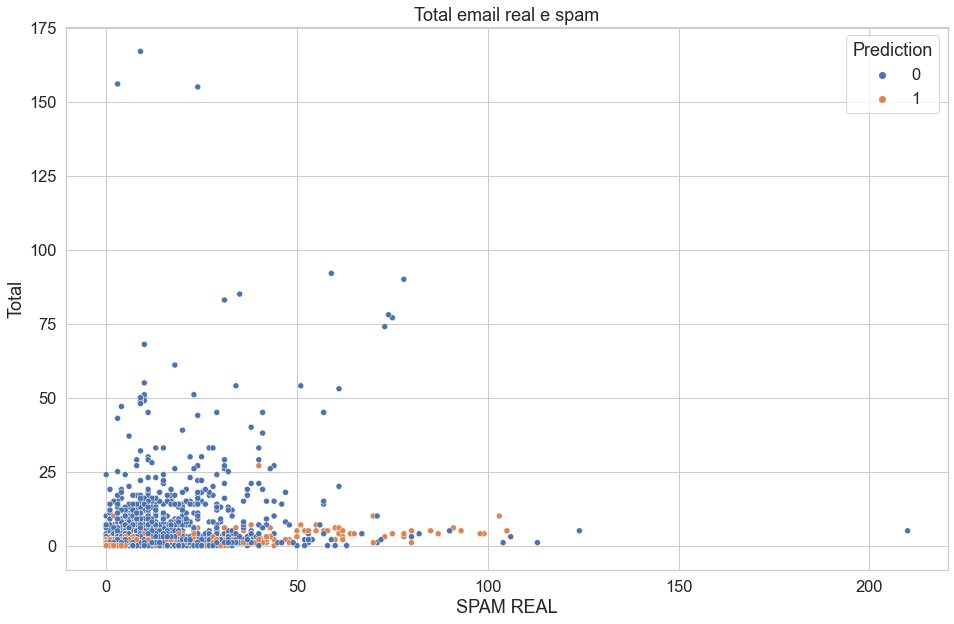

In [17]:
plt.figure(figsize=(15.8, 10))
ax = sns.scatterplot(x="the", y="hou", data = base, hue ="Prediction")
plt.title("Total email real e spam")
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

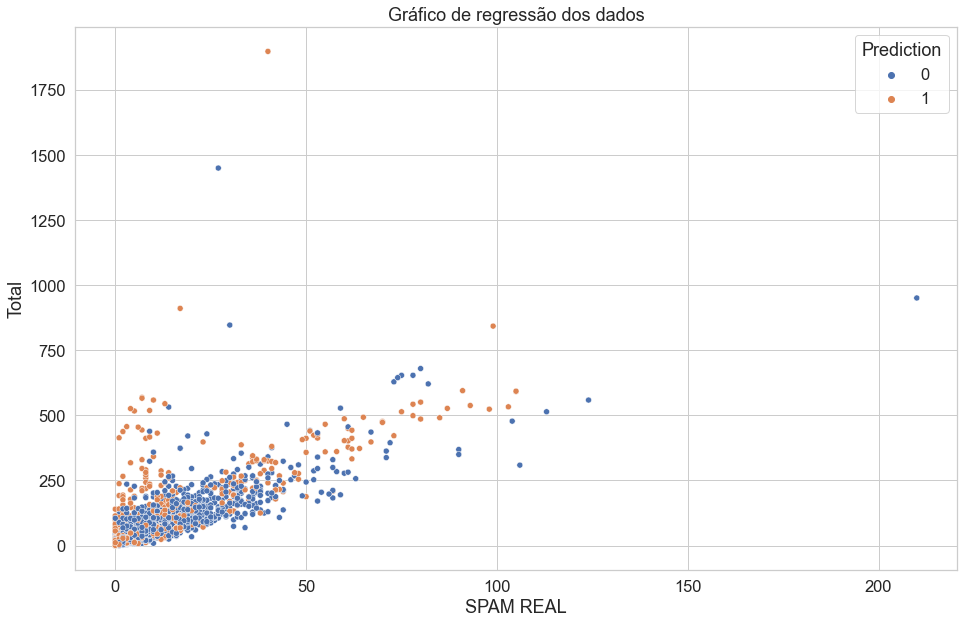

In [18]:
plt.figure(figsize=(15.8, 10))

ax = sns.scatterplot(x="the", y="a", data = base, hue ="Prediction")
plt.title("Gráfico de regressão dos dados")
plt.xlabel("SPAM REAL")
plt.ylabel("Total")

# Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações.

- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

**Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não**

In [19]:
from sklearn.preprocessing import LabelEncoder

for a in base.columns:
    if base[a].dtype == np.number:
        continue
    base[a] = LabelEncoder().fit_transform(base[a])
    
base.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,23,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,21,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,16,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Pré - processamento

- O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

**Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.**

- Treino e teste da base de dados da coluna prediction

In [31]:
# Defenindo base de treino e teste train e test

train = base.iloc[:,1:3001]
test = base.iloc[:,-1].values

In [32]:
# Visualizando linha e coluna da váriavel train
train.shape

(5172, 3000)

In [33]:
# Visualizando linha e coluna da váriavel test
test.shape

(5172,)

**Escalonamento dados**
- Standard Scaler: padroniza um recurso subtraindo a média e escalando para a variância da unidade. 

- A variância da unidade significa dividir todos os valores pelo desvio padrão. StandardScaler resulta em uma distribuição com um desvio padrão igual a 1. 

A variância é igual a 1.

- Variância = desvio padrão ao quadrado. 

- E 1 ao quadrado = 1. 

- StandardScaler torna a média da distribuição aproximadamente 0.

In [34]:
# Escalonamento dos dados
from sklearn.preprocessing import StandardScaler

model_scaler = StandardScaler()
model_scaler_fit = model_scaler.fit_transform(train)
model_scaler_fit

array([[-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       [ 0.13198269,  0.75704542,  2.06177658, ..., -0.05939558,
         0.06674195, -0.07442245],
       [-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       ...,
       [-0.59701422, -0.67459957, -0.39922238, ..., -0.05939558,
        -0.46268959, -0.07442245],
       [-0.414765  ,  0.0962862 , -0.39922238, ..., -0.05939558,
         0.06674195, -0.07442245],
       [ 1.4077273 ,  1.96843734,  0.02877744, ..., -0.05939558,
        -0.46268959, -0.07442245]])

In [35]:
# Visualizando linhas e colunas do escalonamento
model_scaler_fit.shape

(5172, 3000)

# Treino e teste do modelo

- Treino e teste do modelo machine learning
- 80 para dados de treino
- 20 para dados de teste


- train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste.
- test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.
- random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados 

In [36]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 0)

In [37]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(3620, 3000)

In [38]:
# Total de linhas dos dados de treino y
y_train.shape

(3620,)

In [39]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(1552, 3000)

In [40]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(1552,)

# Modelo machine learning

# Modelo 01 - KNN

K-NN: O algoritmo knn ele não possui outro modelo além de armazenar um conjunto de dados inteiro portanto não e necessário aprender. A implementaçãoes podem armazenar dados usando a estrutura de dados complexas com a árvore kd, para fazer uma pesquisa de novos padrões durante a previsão eficiente.

O KNN ele fazer previsões com uma nova instância x no dados de treino para que as k instâncias mais semelhantes **Vizinhos** tendo uma variável saída para instâncias de K. E para regressão pode ser a variável de saída média e na classificação de uma classe.

A determinação quaís as instâncias k no conjunto de dados treinamentos e uma nova entrada e uma distância usada. As variáveis de entrada de um valor real uma medida de distância e popular **Distância euclidiana**.

Na distância ele é calculada com uma raiz quadrada soma das diferenças quadráticas entre novo ponto(x) e ponto existente(xi) os atributos entrada j.

**Distância Euclidiana (x, xi) = sqrt (soma ((xj - xij) ^ 2))**

Existem outras distância:

- Distância de Hamming: Ele calcula a distância nos vetores binários.

- Distância de Minkowski: Também usado em gereralização da distância euclidiana, manhattan.

- Distância de Manhattan: A distância de Manhattan ela calcula a distância entre vetores reais usando a soma de sua diferença absoluta.

**Outros nomes K-NN**

O KNN ele tem sido bem estudado como tal disciplinas diferentes tem nomes diferentes.

- Aprendizado Baseado em Instância: Instâncias treinamento brutas e usado para as previsões o knn é geralmente chamado de aprendizado baseado instâncias ou aprendizado baseado em casos.

- Não paramétrica: No aprendizado modelo todo o trabalho acontece com uma previsão solicitada. O KNN é frequentemente referido como um algoritmo de aprendizado lento.

- Aprendizado Preguiçoso: KNN não faz suposições sobre a forma funcional do problema a ser resolvido. Como tal, o KNN é referido como um algoritmo de aprendizagem de máquina não paramétrico.


# Regressão com KNN

O k-nn e usado para problemas regressão com a previsão baseada com média ou na mediana instâncias semelhantes

# Classificação com KNN

KNN usado para classificação a saida pode ser calculada com uma classe com maior frequência das instâncias. A Cada instância, em essência, vota em sua classe e a classe com o maior número de votos é considerada a predição.

As probabilidades de classe podem ser calculadas como a frequência normalizada de amostras que pertencem a cada classe no conjunto de K instâncias mais semelhantes para uma nova instância de dados. Por exemplo, em um problema de classificação binária (a classe é 0 ou 1):

**p (classe = 0) = contagem (classe = 0) / (contagem (classe = 0) + contagem (classe = 1))**

Se você está usando K e você tem um número par de classes (por exemplo, 2), é uma boa idéia escolher um valor K com um número ímpar para evitar empate. E o inverso, use um número par para K quando você tiver um número ímpar de classes.

Os empates podem ser quebrados consistentemente expandindo K por 1 e observando a classe da próxima instância mais semelhante no conjunto de dados de treinamento.

# Melhor preparação dos dados para KNN

- Rescale Data: O KNN funciona muito melhor se todos os dados tiverem a mesma escala. Normalizar seus dados para o intervalo [0, 1] é uma boa ideia. Também pode ser uma boa ideia padronizar seus dados se tiver uma distribuição gaussiana.


- Endereço de dados ausentes: Dados ausentes significam que a distância entre as amostras não pode ser calculada. Essas amostras podem ser excluídas ou os valores ausentes podem ser imputados.


- Dimensionalidade inferior: o KNN é adequado para dados dimensionais inferiores. Você pode experimentá-lo em dados de alta dimensão (centenas ou milhares de variáveis ​​de entrada), mas esteja ciente de que ele pode não funcionar tão bem quanto outras técnicas. O KNN pode se beneficiar da seleção de recursos que reduz a dimensionalidade do espaço do recurso de entrada.

In [41]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_modelo = KNeighborsClassifier() # Nome do algoritmo M.L
knn_modelo_fit = knn_modelo.fit(x_train, y_train) # Treinamento do modelo
knn_modelo_score_1 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino x
knn_modelo_score_2 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino y

print("Treinamento base treino:", knn_modelo_score_1)
print("Treinamento base teste:", knn_modelo_score_2)

Treinamento base treino: 0.9091160220994475
Treinamento base teste: 0.9091160220994475
Wall time: 1.91 s


In [42]:
# Previsão do modelo
knn_modelo_pred = knn_modelo.predict(x_test)
knn_modelo_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

- Accuracy

Ela indica performance geral do modelo dentros todos as classificações quantas modelo classificou corretamente.

In [43]:
# Accuracy do modelo - K-NN
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, knn_modelo_pred)
print("Accuracy - K-NN: %.2f" % (accuracy_knn * 100))

Accuracy - K-NN: 85.82


**Matrix confusion ou Matriz de Confusão**

A matriz de confusão uma tabela que indica erros e acertos do modelo comparando com um resultado.

- Verdadeiros Positivos: A classificação da classe positivo.
- Falsos Negativos (Erro Tipo II): Erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
- Falsos Positivos (Erro Tipo I): Erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo
- Verdadeiros Negativos: Classificação correta da classe Negativo.

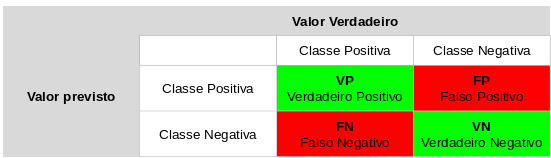

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

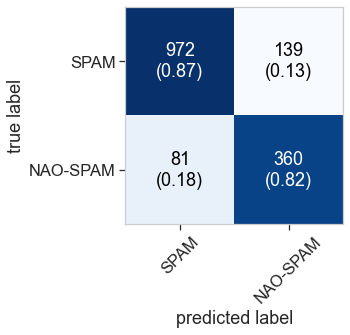

In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matrix_confusion_1 = confusion_matrix(y_test, knn_modelo_pred)
plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM']) 

**Curva roc** 

A curva roc ela exibir graficamente comparar a avaliar acurácia. As curvas roc integram três medidas precisão relacionadas a sensibilidade com os verdadeiro e positivo, especificidade com os verdadeiro negativo.

roc_auc 0.923178032088923


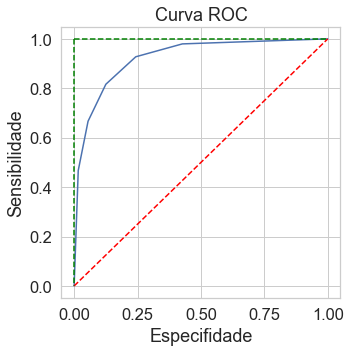

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = knn_modelo.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

**Classification report**

- O visualizador do relatório de classificação exibe as pontuações de precisão, recuperação, F1 e suporte para o modelo. Para facilitar a interpretação e a detecção de problemas, o relatório integra pontuações numéricas com um mapa de calor codificado por cores. Todos os mapas de calor estão na faixa para facilitar a comparação fácil de modelos de classificação em diferentes relatórios de classificação.

In [46]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, knn_modelo_pred)
print("Modelo -  KNN Classifier")
print()
print(classification)

Modelo -  KNN Classifier

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1111
           1       0.72      0.82      0.77       441

    accuracy                           0.86      1552
   macro avg       0.82      0.85      0.83      1552
weighted avg       0.87      0.86      0.86      1552



**Métricas classificação**

- **Precision score**: A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.


- **Recall score**: O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.


- **Accuracy**: A acurácia é uma boa indicação geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa. Por exemplo, na criação de um modelo de identificação de fraudes em cartões de crédito, o número de casos considerados como fraude pode ser bem pequeno em relação ao número de casos considerados legais. Para colocar em números, em uma situação hipotética de 280000 casos legais e 2000 casos fraudulentos, um modelo simplório que simplesmente classifica tudo como legal obteria uma acurácia de 99,3%. Ou seja, você estaria validando como ótimo um modelo que falha em detectar fraudes.


- **F1_Score**: O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, knn_modelo_pred)
Recall = recall_score(y_test, knn_modelo_pred)
Accuracy = accuracy_score(y_test, knn_modelo_pred)
F1_Score = f1_score(y_test, knn_modelo_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.858247
1,Recall,0.816327
3,F1_Score,0.765957
0,precision,0.721443


# Modelo 2 - Regressão logística

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

A regressão logística é amplamente usada em ciências médicas e sociais, e tem outras denominações, como modelo logístico, modelo logit, e classificador de máxima entropia. A regressão logística é utilizada em áreas como as seguintes:

Em medicina, permite por exemplo determinar os factores que caracterizam um grupo de indivíduos doentes em relação a indivíduos sãos;
No domínio dos seguros, permite encontrar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular;
Em instituições financeiras, pode detectar os grupos de risco para a subscrição de um crédito;
Em econometria, permite explicar uma variável discreta, como por exemplo as intenções de voto em actos eleitorais.
O êxito da regressão logística assenta sobretudo nas numerosas ferramentas que permitem interpretar de modo aprofundado os resultados obtidos.

Em comparação com as técnicas conhecidas em regressão, em especial a regressão linear, a regressão logística distingue-se essencialmente pelo facto de a variável resposta ser categórica.

Enquanto método de predição para variáveis categóricas, a regressão logística é comparável às técnicas supervisionadas propostas em aprendizagem automática (árvores de decisão, redes neurais, etc.), ou ainda a análise discriminante preditiva em estatística exploratória. É possível de as colocar em concorrência para escolha do modelo mais adaptado para um certo problema preditivo a resolver.

Trata-se de um modelo de regressão para variáveis dependentes ou de resposta binomialmente distribuídas. É útil para modelar a probabilidade de um evento ocorrer como função de outros factores. É um modelo linear generalizado que usa como função de ligação a função logit.


# Aplicações de Regressão Logística

Existem vários campos e maneiras em que a regressão logística pode ser usada e isso inclui quase todos os campos das ciências médicas e sociais.

**Saúde**
Por exemplo, o Trauma and Injury Severity Score (TRISS) é usado no mundo todo para prever fatalidade em pacientes feridos. Este modelo foi desenvolvido com a aplicação de regressão logística. Ele usa variáveis como a pontuação revisada do trauma, a pontuação da gravidade da lesão e a idade do paciente para prever os resultados de saúde. É uma técnica que pode até ser usada para prever a possibilidade de uma pessoa apresentar determinada doença. Por exemplo, doenças como diabetes e doenças cardíacas podem ser previstas com base em variáveis como idade, sexo, peso e fatores genéticos.

**Política**
A regressão logística também pode ser usada para tentar prever eleições. Um líder democrata, republicano ou independente chegará ao poder nos EUA? Essas previsões são feitas com base em variáveis como idade, sexo, local de residência, posição social e padrões de votação anteriores (variáveis) para produzir uma previsão de voto (variável de resposta).

**Teste de produto**
A regressão logística pode ser usada em engenharia para prever o sucesso ou falha de um sistema que está sendo testado ou de um protótipo de produto.

**Marketing**
LR pode ser usado para prever as chances de uma consulta do cliente se transformar em uma venda, a possibilidade de uma assinatura ser iniciada ou encerrada ou até mesmo o interesse potencial do cliente em uma nova linha de produtos.

**Setor financeiro**
Um exemplo de uso no setor financeiro é em uma empresa de cartão de crédito que o utiliza para prever a probabilidade de um cliente não pagar seus pagamentos. O modelo construído pode ser para a emissão de um cartão de crédito para um cliente ou não. O modelo pode dizer se um determinado cliente “ficará inadimplente” ou “não ficará inadimplente”. Isso é conhecido como “modelagem de propensão de padrão” em termos bancários.

**Comércio eletrônico**
Na mesma linha, as empresas de comércio eletrônico investem pesadamente em campanhas publicitárias e promocionais em toda a mídia. Eles querem ver qual campanha é a mais eficaz e a opção com maior probabilidade de obter uma resposta de seu público-alvo potencial. O conjunto de modelos categorizará o cliente como “respondente” ou “não respondente”. Este modelo é chamado de modelagem de propensão para resposta.

Com informações que vêm de resultados de regressão logística, as empresas são capazes de otimizar suas estratégias e atingir as metas de negócios com redução de despesas e perdas. As regressões logísticas ajudam a maximizar o retorno sobre o investimento (ROI) em campanhas de marketing, um benefício para os resultados financeiros de uma empresa no longo prazo.

In [48]:
%%time
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(x_train, y_train)
model_lr_score = model_lr.score(x_train, y_train)

print("Modelo - Regressão logistica: %.2f" % (model_lr_score * 100))

Modelo - Regressão logistica: 99.17
Wall time: 1.46 s


In [103]:
# Previsão do modelo

model_lr_pred = model_lr.predict(x_test)
model_lr_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
# Accuracy do modelo
accuracy_regression_logistic = accuracy_score(y_test, model_lr_pred)

print("Accuracy - Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Logistic regression: 96.97


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

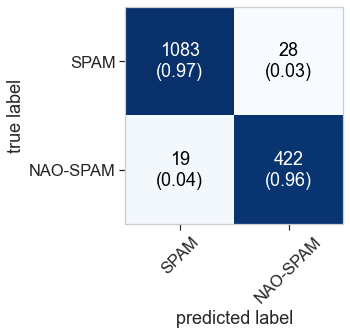

In [50]:
# Matrix confusion do modelo
matrix_confusion_2 = confusion_matrix(y_test, model_lr_pred)
plot_confusion_matrix(matrix_confusion_2, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9907439723564193


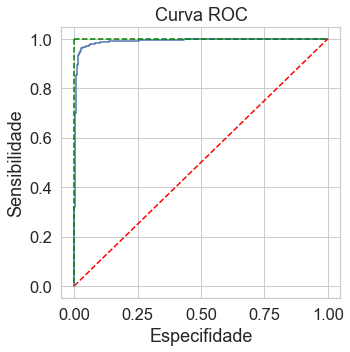

In [51]:
# A Curva roc
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_lr.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [52]:
# Classification report

classification = classification_report(y_test, model_lr_pred)
print("Modelo -  Logistic Regression")
print()
print(classification)

Modelo -  Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1111
           1       0.94      0.96      0.95       441

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552



In [53]:
# Metricas 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_lr_pred)
Recall = recall_score(y_test, model_lr_pred)
Accuracy = accuracy_score(y_test, model_lr_pred)
F1_Score = f1_score(y_test, model_lr_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.969716
1,Recall,0.956916
3,F1_Score,0.947250
0,precision,0.937778


# Modelo 03 - Decision Tree

- Árvores de decisão são métodos de classificação que podem extrair regras simples sobre os recursos de dados que são inferidos do conjunto de dados de entrada. Vários algoritmos para indução de árvore de decisão estão disponíveis na literatura. Scikit-learn contém a implementação do algoritmo de indução CART (Árvores de Classificação e Regressão).

In [54]:
%%time
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth=4, random_state=0)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 85.25
Wall time: 343 ms


In [55]:
# Previsão do modelo

modelo_arvore_pred = modelo_arvore_cla_1.predict(x_test)
modelo_arvore_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# Accuracy do modelo previsão
accuracy_decision_tree = accuracy_score(y_test, modelo_arvore_pred)

print("Acuracia - Decision Tree: %.2f" % (accuracy_decision_tree * 100))

Acuracia - Decision Tree: 86.15


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

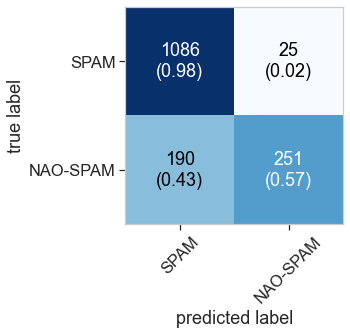

In [57]:
# Matrix confusion do modelo
matrix_confusion_3 = confusion_matrix(y_test, modelo_arvore_pred)
plot_confusion_matrix(matrix_confusion_3, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

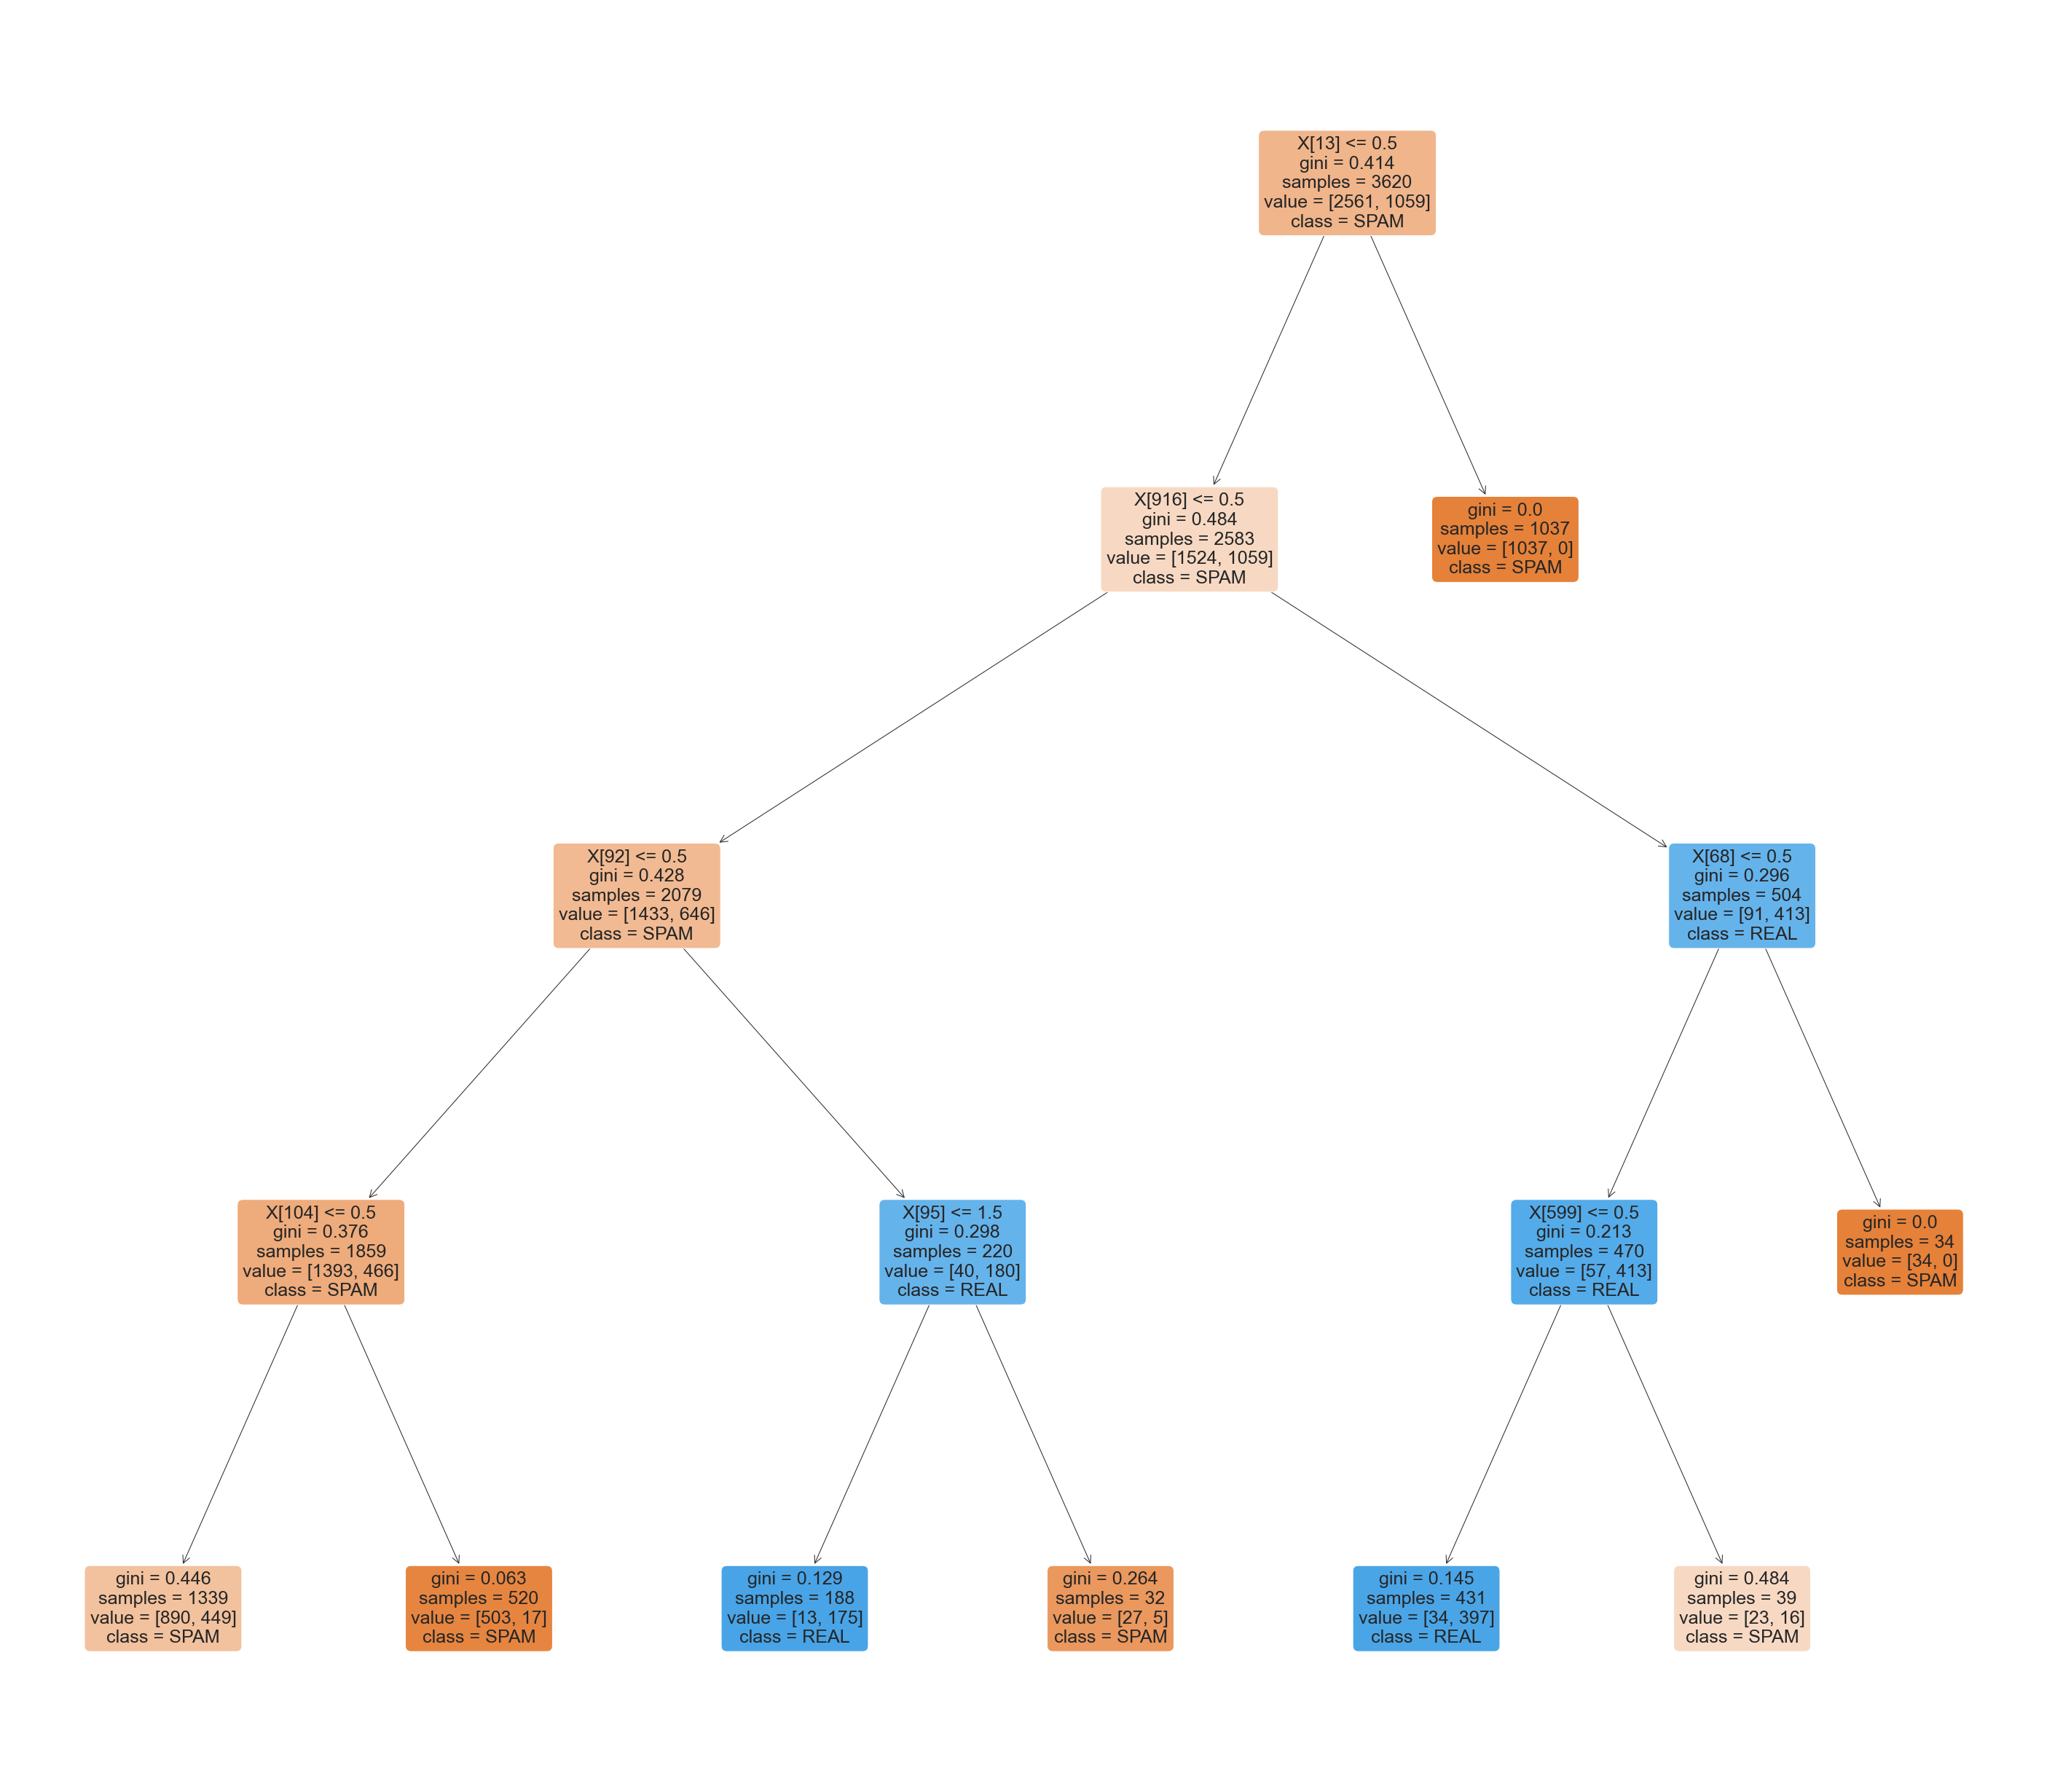

In [58]:
# Gráfico da árvore 
from sklearn import tree

fig, ax = plt.subplots(figsize=(50.5, 45), facecolor = "w")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 25.18, 
               rounded = True, 
               filled = True, 
               class_names = ["SPAM", "REAL"])
plt.show()

roc_auc 0.8997920200183284


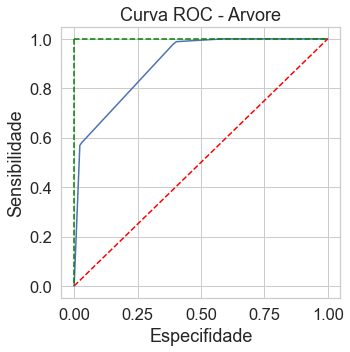

In [59]:
# Curva ROC - Árvore
roc = modelo_arvore_cla_1.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Árvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [60]:
# Classification report
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1111
           1       0.91      0.57      0.70       441

    accuracy                           0.86      1552
   macro avg       0.88      0.77      0.81      1552
weighted avg       0.87      0.86      0.85      1552



In [61]:
# Métricas do modelo
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.909420
2,Accuracy,0.861469
3,F1_Score,0.700139
1,Recall,0.569161


# Modelo 4 - Naive bayes

O Naive Bayes é um algoritmo classificador probabilístico ele baseado no teorema de bayes. Hoje é também utilizado na área de Aprendizado de Máquina (Machine Learning) para categorizar textos com base na frequência das palavras usadas.

Entre as possibilidades de aplicações está a classificação de um e-mail como SPAM ou Não-SPAM e a identificação de um assunto com base em seu conteúdo.

Ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis (features). Ou seja, se determinada fruta é rotulada como “Limão”, caso ela também seja descrita como “Verde” e “Redonda”, o algoritmo não vai levar em consideração a correlação entre esses fatores. Isso porque trata cada um de forma independente.

# Aplicação do Naive Bayes

Frequentemente aplicado em processamento de linguagem natural e diagnósticos médicos, o método pode ser usado quando os atributos que descrevem as instâncias forem condicionalmente independentes. Ou seja, o teorema de Bayes trata sobre probabilidade condicional. Isto é, qual a probabilidade de o evento A ocorrer, dado o evento B.

Um problema simples que exemplifica bem o teorema é o cálculo de probabilidades em cima de diagnóstico de doenças.

Imagine que estamos trabalhando no diagnóstico de uma nova doença. Após realizar testes, coletas e análises com 100 pessoas distintas, descobrimos que 20 pessoas possuíam a doença (20%) e 80 pessoas estavam saudáveis (80%).

De todas as pessoas que possuíam a doença, 90% receberam Positivo no teste. Já 30% das pessoas que não possuíam a doença também receberam o teste positivo.

In [62]:
%%time
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB()
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100))

Modelo - Naive Bayes: 96.66
Wall time: 528 ms


In [63]:
# Previsão do modelo - Naive bayes

model_naive_bayes_pred_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_pred_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [64]:
# Previsão com função probabiliestico do modelo - Naive bayes
model_naive_bayes_pred = model_naive_bayes.predict_proba(x_test)
model_naive_bayes_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [65]:
accuracy_naive_bayes = accuracy_score(y_test, model_naive_bayes_pred_predict)

print("Accuracy Naive bayes: %.2f" % (accuracy_naive_bayes * 100))

Accuracy Naive bayes: 94.72


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

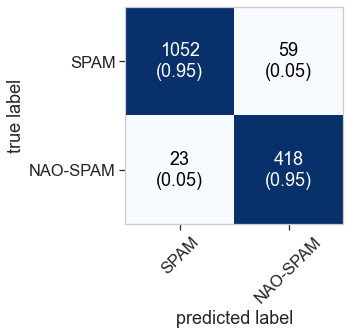

In [66]:
matrix_confusion_4 = confusion_matrix(y_test, model_naive_bayes_pred_predict)
plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9492520680639492


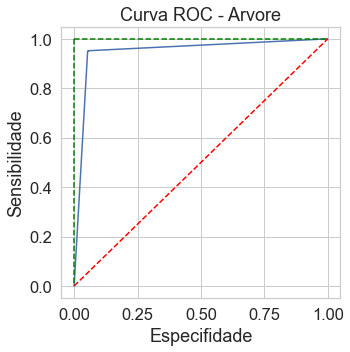

In [67]:
roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [68]:
class_report = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo 04 - Naive Bayes")
print("\n")
print(class_report)

Modelo 04 - Naive Bayes


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



In [69]:
precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.947846
2,Accuracy,0.947165
3,F1_Score,0.910675
0,precision,0.876310


# Modelo 5 - Gradient Boosting

Gradient Boosting é um outro tipo de algoritmo de Boosting, que difere do Adaboost quanto à maneira com a qual os modelos são treinados com relação aos anteriores.

Ao invés de estabelecer pesos para os weak learners, o Gradient Boosting treina novos modelos diretamente no erro dos modelos anteriores. Ou seja, os novos modelos tentam prever o erro dos modelos anteriores em vez de prever independentemente o target. Dessa forma, obtemos a predição final somando a predição de todos os weak learners.

O algoritmo do Gradient Boosting funciona assim: o primeiro modelo faz uma aproximação bem simples da predição, e obtemos os nossos erros residuais (observado menos o previsto); depois, treinamos mais modelos nesses erros residuais, para tentar predizer o erro do primeiro modelo. Dessa forma, quando somamos as predições de cada modelo para obter a predição final, obtemos uma versão mais corrigida da primeira predição:

In [70]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Naive Bayes: 98.31
Wall time: 22.7 s


In [71]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [72]:
# Accuracy do modelo 
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)

print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 96.20


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

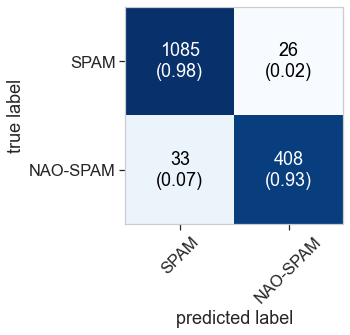

In [73]:
# Matrix confusion do modelo 
matrix_confusion_5 = confusion_matrix(y_test, model_gradient_boosting_pred)
plot_confusion_matrix(matrix_confusion_5, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9947137570899947


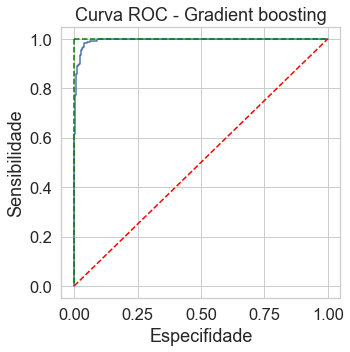

In [74]:
# Curva ROC - Gradient boosting
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [75]:
# Classification report
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo 05 - Gradient boosting")
print("\n")
print(classification)

Modelo 05 - Gradient boosting


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1111
           1       0.94      0.93      0.93       441

    accuracy                           0.96      1552
   macro avg       0.96      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552



In [76]:
# Métricas do modelo 
precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.961985
0,precision,0.940092
3,F1_Score,0.932571
1,Recall,0.925170


In [77]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["K-NN", 
               "Regression Logistic", 
               "Decision tree", 
               "Naive bayes",
               "Gradient boosting"],

    "Acurácia" :[accuracy_knn, 
                 accuracy_regression_logistic, 
                 accuracy_decision_tree, 
                 accuracy_naive_bayes,
                 accuracy_model_gradient_boosting]})

modelos_1 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_1.to_csv("modelos_1.csv")
modelos_1

,Models,Acurácia
1,Regression Logistic,0.969716
4,Gradient boosting,0.961985
3,Naive bayes,0.947165
2,Decision tree,0.861469
0,K-NN,0.858247


In [78]:
# Salvando modelo Machine learning

import pickle    
    
with open('model_lr_pred.pkl', 'wb') as file:
    pickle.dump(model_lr_pred, file)
    
with open('model_naive_bayes_pred_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred_predict, file)
    
with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)

# Pipeline machine learning

Um pipeline de aprendizado de máquina pode ser criado reunindo uma sequência de etapas envolvidas no treinamento de um modelo de aprendizado de máquina. Ele pode ser usado para automatizar um fluxo de trabalho de aprendizado de máquina. O pipeline pode envolver pré-processamento, seleção de recursos, classificação / regressão e pós-processamento. Aplicativos mais complexos podem precisar se encaixar em outras etapas necessárias dentro deste pipeline.

Por otimização, queremos dizer ajustar o modelo para o melhor desempenho. O sucesso de qualquer modelo de aprendizagem depende da seleção dos melhores parâmetros que fornecem os melhores resultados possíveis. A otimização pode ser vista em termos de um algoritmo de busca, que percorre um espaço de parâmetros e busca o melhor deles.

**Pipeline 1 - KNN**

In [79]:
# Modelo pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline

data_pipeline = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", KNeighborsClassifier()) # Classificador : KNeighborsClassifier (), que implementa o classificador de k-vizinho mais próximo e seleciona a classe dos k pontos principais, que estão mais próximos do exemplo de teste.
])

data_pipeline_fit = data_pipeline.fit(x_train, y_train)
data_pipeline_score = data_pipeline.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.8773480662983425
Treinamento base teste - Pipeline: 0.8195876288659794


In [80]:
# Previsão do pipeline do modelo
data_pipeline_pred_1 = data_pipeline.predict(x_test)
data_pipeline_pred_1

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [81]:
# Accuracy do pipeline
accuracy_pipeline_1 = accuracy_score(y_test, data_pipeline_pred_1)
print("Accuracy - pipeline: %.2f" % (accuracy_pipeline_1 * 100))

Accuracy - pipeline: 81.96


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

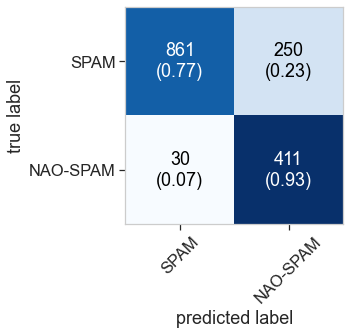

In [82]:
# A confusion matrix do modelo
matrix_1 = confusion_matrix(y_test, data_pipeline_pred_1)
plot_confusion_matrix(matrix_1, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9280795426481424


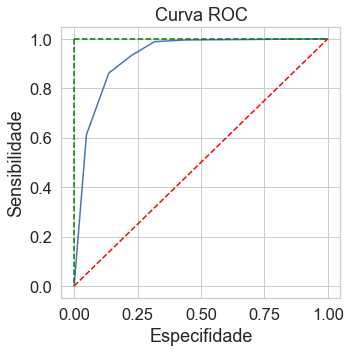

In [83]:
# Curva ROC do modelo
roc = data_pipeline.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [84]:
# Classification report do modelo
classification = classification_report(y_test, data_pipeline_pred_1)
print("Modelo - Pipeline 1")
print()
print(classification)

Modelo - Pipeline 1

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1111
           1       0.62      0.93      0.75       441

    accuracy                           0.82      1552
   macro avg       0.79      0.85      0.80      1552
weighted avg       0.87      0.82      0.83      1552



In [85]:
# Métricas do modelo 
precision = precision_score(y_test, data_pipeline_pred_1)
Recall = recall_score(y_test, data_pipeline_pred_1)
Accuracy = accuracy_score(y_test, data_pipeline_pred_1)
F1_Score = f1_score(y_test, data_pipeline_pred_1)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.931973
2,Accuracy,0.819588
3,F1_Score,0.745917
0,precision,0.621785


**Pipeline 2 - Decision Tree Classifier**

In [86]:
# Pipeline decision Tree Classifier
data_pipeline_2 = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", DecisionTreeClassifier(max_depth=4, random_state=0)) # Classificador : DecisionTreeClassifier (), que implementa o classificador de árvore decisão Árvores de decisão são métodos de classificação que podem extrair regras simples sobre os recursos de dados que são inferidos do conjunto de dados de entrada
])

data_pipeline2_fit = data_pipeline_2.fit(x_train, y_train)
data_pipeline2_score = data_pipeline_2.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_2.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_2.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.8524861878453038
Treinamento base teste - Pipeline: 0.8614690721649485


In [87]:
# Previsão do pipeline 
data_pipeline_pred_2 = data_pipeline_2.predict(x_test)
data_pipeline_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
# Accuracy do pipeline
accuracy_pipeline_2 = accuracy_score(y_test, data_pipeline_pred_2)
print("Accuracy Pipeline 2: %.2f" % (accuracy_pipeline_2 * 100))

Accuracy Pipeline 2: 86.15


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

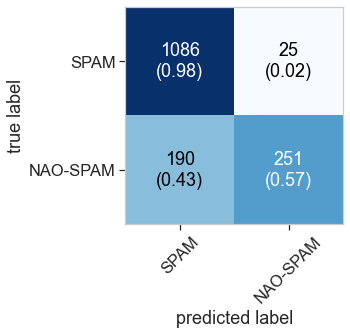

In [89]:
# A matrix confusion do modelo
matrix_confusion_1 = confusion_matrix(y_test, data_pipeline_pred_2)
plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.8997920200183284


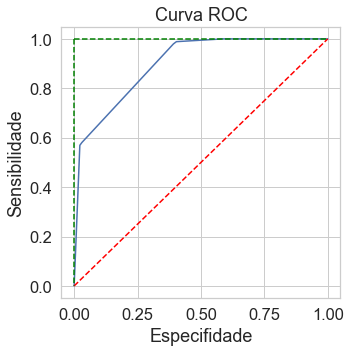

In [90]:
# Curva ROC do modelo
roc = data_pipeline_2.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [91]:
# Classification_report
classification = classification_report(y_test, data_pipeline_pred_2)
print("Modelo Pipeline 2")
print()
print(classification)

Modelo Pipeline 2

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1111
           1       0.91      0.57      0.70       441

    accuracy                           0.86      1552
   macro avg       0.88      0.77      0.81      1552
weighted avg       0.87      0.86      0.85      1552



In [92]:
# Méricas do modelo
precision = precision_score(y_test, data_pipeline_pred_2)
Recall = recall_score(y_test, data_pipeline_pred_2)
Accuracy = accuracy_score(y_test, data_pipeline_pred_2)
F1_Score = f1_score(y_test, data_pipeline_pred_2)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.909420
2,Accuracy,0.861469
3,F1_Score,0.700139
1,Recall,0.569161


**Pipeline 3 - Naive bayes**

In [93]:
# Pipeline Naive bayes
data_pipeline_3 = Pipeline([
    ("scaler", StandardScaler()), 
    ("selector", VarianceThreshold()), 
    ("classifier", GaussianNB())])

data_pipeline3_fit = data_pipeline_3.fit(x_train, y_train)
data_pipeline3_score = data_pipeline_3.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_3.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_3.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9571823204419889
Treinamento base teste - Pipeline: 0.9342783505154639


In [94]:
# Previsão do pipeline
data_pipeline_pred_3 = data_pipeline_3.predict(x_test)
data_pipeline_pred_3

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [95]:
# Accuracy do pipeline
accuracy_pipeline_3 = accuracy_score(y_test, data_pipeline_pred_3)
print("Accuracy pipeline 3: %.2f" % (accuracy_pipeline_3 * 100))

Accuracy pipeline 3: 93.43


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

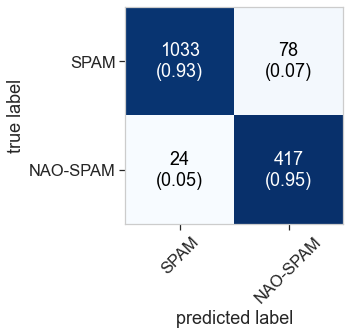

In [96]:
# A matrix confusion pipeline
matrix_confusion_4 = confusion_matrix(y_test, data_pipeline_pred_3)
plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['SPAM', 'NAO-SPAM'])

roc_auc 0.9376366208049376


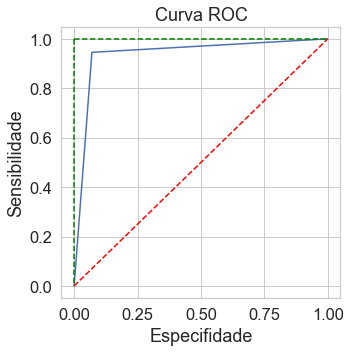

In [97]:
# Curva ROC do pipeline
roc = data_pipeline_3.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [98]:
# Classification report do modelo
class_report = classification_report(y_test, data_pipeline_pred_3)
print("Modelo 03 - Pipeline")
print("\n")
print(class_report)

Modelo 03 - Pipeline


              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1111
           1       0.84      0.95      0.89       441

    accuracy                           0.93      1552
   macro avg       0.91      0.94      0.92      1552
weighted avg       0.94      0.93      0.94      1552



In [99]:
# Metricas do pipeline
precision = precision_score(y_test, data_pipeline_pred_3)
Recall = recall_score(y_test, data_pipeline_pred_3)
Accuracy = accuracy_score(y_test, data_pipeline_pred_3)
F1_Score = f1_score(y_test, data_pipeline_pred_3)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.945578
2,Accuracy,0.934278
3,F1_Score,0.891026
0,precision,0.842424


In [100]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Pipeline 1: K-NN", 
               "Pipeline 2: Decision tree", 
               "Pipeline 3: Naive bayes"],

    "Acurácia" :[accuracy_pipeline_1, 
                      accuracy_pipeline_2, 
                      accuracy_pipeline_3]})

modelos_2 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_2.to_csv("modelos_2.csv")
modelos_2

,Models,Acurácia
2,Pipeline 3: Naive bayes,0.934278
1,Pipeline 2: Decision tree,0.861469
0,Pipeline 1: K-NN,0.819588


In [101]:
# Salvando pipeline Machine learning

import pickle    
    
with open('data_pipeline_pred_1.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_1, file)
    
with open('data_pipeline_pred_2.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_2, file)
    
with open('data_pipeline_pred_3.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_3, file)

# Resultado

In [102]:
print("Sem pipeline")
print(modelos_1)
print("\n")

print("Com pipeline")
print(modelos_2)

Sem pipeline
                Models  Acurácia
1  Regression Logistic  0.969716
4    Gradient boosting  0.961985
3          Naive bayes  0.947165
2        Decision tree  0.861469
0                 K-NN  0.858247


Com pipeline
                      Models  Acurácia
2    Pipeline 3: Naive bayes  0.934278
1  Pipeline 2: Decision tree  0.861469
0           Pipeline 1: K-NN  0.819588


# Conclusão

Nesse projeto eu fiz um modelo que faz classificação de email e spam ele classificar emails verdadeiros e não pela matriz de confussão para spam deu 1111 e para real 441 nesse objetivo era classificar spam.
Na outra parte do modelo eu fiz um pipeline para otimização do modelo para não ter overfitting no primeiro modelo que foi o Regression Logistic ele ficou com uma acurácia de 94% e com o pipeline deu 93% ficar sem overfitting.

Outra análise foi o segundo modelo 2 que foi o pipeline K-NN sem o pipeline tendo uma acurácia de 85%e com o pipeline fez uma melhorou no modelo 81%.
Portanto o melhor foi pipeline de Naive Bayes.
